# Proyecto 2
# Introducción 
# ---------------------------------------------------

<h2>Tabla de contenidos</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px; background-color: #FFECB3; color: #FFB300;">
<ol>
    <li> Validación cruzada </li>
    <li> Regresión lineal simple </li>
    <li> Regresión lineal múltiple </li>
    <li> Regresión no lineal </li>
    <li> Regresión lineal con regularizacion </li>
    <li> Comparación de los resultados obtenidos con los diferentes modelos </li>
 
   
</ol>

</div>

<hr>

In [61]:
# Importaciones de librerías necesarias
from sklearn.model_selection import cross_val_score
from sklearn import model_selection   
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression

# Tema 2

In [62]:
# Para la regresión, vamos a utilizar como variable dependiente la CPK, nuestro objetivo será predecir los niveles de CPK

# Cargamos la base de datos
data = pd.read_csv("entrenamiento.csv")

# Definimos las variables de entrada y de salida
data_input = data.drop(['creatinine_phosphokinase','DEATH_EVENT'], axis=1) 
data_output = data['creatinine_phosphokinase']

# Vamos a comprobar que variable permite una mejor estimacion de la variable dependiente
# Primero dividimos el conjunto de entrenamiento en dos partes, una para entrenar y otra para validar

X_train, X_test, Y_train, Y_test = train_test_split(data_input, data_output, test_size=0.3, random_state = 777)

### Normalizamos 

In [63]:
# Normalizamos los datos del conjunto train
from sklearn import preprocessing

X_res_train = X_train.copy()

scaler = preprocessing.MinMaxScaler()

# Todos los valores están en el rango [0,1]
data_minmax = scaler.fit_transform(X_res_train)

scaled_train = pd.DataFrame(data_minmax, columns=X_res_train.columns)
scaled_train.describe()

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,0.426377,0.454545,0.420455,0.433949,0.454545,0.392704,0.301510,0.597403,0.613636,0.295455,0.387736
std,0.233717,0.500783,0.496461,0.244455,0.500783,0.164162,0.214593,0.194123,0.489706,0.458861,0.293012
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272727,0.000000,0.000000,0.270833,0.000000,0.296739,0.190476,0.476190,0.000000,0.000000,0.101887
50%,0.387882,0.000000,0.000000,0.437500,0.000000,0.391304,0.238095,0.619048,1.000000,0.000000,0.313208
75%,0.545455,1.000000,1.000000,0.583333,1.000000,0.441848,0.345238,0.714286,1.000000,1.000000,0.679245
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [64]:
# Normalizamos el conjunto de test

X_res_test = X_test.copy()

# Todos los valores están en el rango [0,1]
data_minmax = scaler.transform(X_res_test)

scaled_test = pd.DataFrame(data_minmax, columns=X_res_test.columns)
scaled_test.describe()

# Comprobamos que la normalizacion  del test esta bien al observar que los valores maximos y minimos no son solamnete 1 y 0 (hemos utilizado el scaler del train)

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,0.417544,0.500000,0.500000,0.398026,0.447368,0.411654,0.322989,0.550937,0.684211,0.263158,0.354121
std,0.243465,0.506712,0.506712,0.239493,0.503897,0.215505,0.247220,0.157426,0.471069,0.446258,0.291629
min,0.000000,0.000000,0.000000,-0.041667,0.000000,-0.056522,-0.047619,0.190476,0.000000,0.000000,-0.007547
25%,0.181818,0.000000,0.000000,0.270833,0.000000,0.288043,0.190476,0.440476,0.000000,0.000000,0.100943
50%,0.436364,0.500000,0.500000,0.375000,0.000000,0.406911,0.257143,0.571429,1.000000,0.000000,0.273585
75%,0.595455,1.000000,1.000000,0.479167,1.000000,0.529891,0.404762,0.666667,1.000000,0.750000,0.583962
max,1.000000,1.000000,1.000000,0.895833,1.000000,0.843478,1.142857,0.857143,1.000000,1.000000,0.898113


### Regresor lineal

In [65]:
datos_a_correlar = scaled_train.copy()
datos_a_correlar["creatinine_phosphokinase"] = Y_train

# Mostramos la matriz de correlacion para saber que datos están mas correlados con la variable dependiente. No debemos coger valores muy altos ya que se producira multicolinealidad.
correlacion = datos_a_correlar.corr()
print(correlacion)
# Vemos que platelets, age, o high blood preassure son buenas opciones

                               age   anaemia  diabetes  ejection_fraction  \
age                       1.000000 -0.022076 -0.046849           0.161716   
anaemia                  -0.022076  1.000000 -0.130291           0.093537   
diabetes                 -0.046849 -0.130291  1.000000          -0.088185   
ejection_fraction         0.161716  0.093537 -0.088185           1.000000   
high_blood_pressure       0.017207 -0.100000  0.147103          -0.117722   
platelets                -0.044028 -0.208629  0.075807           0.026037   
serum_creatinine          0.169503  0.024839 -0.032745          -0.279697   
serum_sodium             -0.084807  0.017915 -0.069185           0.233609   
sex                       0.278750 -0.072436 -0.127866          -0.135614   
smoking                   0.283108 -0.140967 -0.097472          -0.127167   
time                     -0.139400 -0.070352  0.054342          -0.023411   
creatinine_phosphokinase  0.173839 -0.204416  0.151376          -0.064592   

In [66]:
# Tambien vamos a realizar un analisis usando SelectKBest

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

# Aplicamos el metodo
selector = SelectKBest(score_func=f_regression, k=3) # k es el numero de variables que queremos seleccionar
selector.fit(scaled_train, Y_train)

# Mostramos las variables seleccionadas
indices_seleccionados = selector.get_support()
print(indices_seleccionados)

# Mostramos los nombres de las variables seleccionadas
caracteristicas = scaled_train.columns
print(f"Caracteristicas seleccionadas por el selector: {caracteristicas[indices_seleccionados]}")

#print(selector.pvalues_ < 0.05) El único pvalor < 0.05 es el de la variable time, pero también hemos podido observar
# en la matriz de correlación, que no está nada correlada con la variable dependiente, por lo que no la vamos a utilizar.

[False  True False False False False False False False  True  True]
Caracteristicas seleccionadas por el selector: Index(['anaemia', 'smoking', 'time'], dtype='object')


In [67]:
# Creamos dos listas vacias para guardar los resultados de las metricas
r2_results=[] # error cuadratico medio
mse_results=[] # MSE
rmse_results_cv = [] # RMSE con validacion cruzada
r2_results_cv = [] # R^2 con validacion cruzada

# Regresión lineal simple
regressor = LinearRegression()

# Entrenamos el modelo utilizando los datos de train
regressor = regressor.fit(np.array(scaled_train['serum_creatinine']).reshape(-1, 1), Y_train)

# Mostramos el valor del intercepto (wo)
w0 = regressor.intercept_
print(f"Valor del intercepto: {w0}")

# Mostramos el valor de los coeficientes (w1)
w1 = regressor.coef_ # Del resultado podemos decir que a medida que aumenta el valor de CPK, disminuyen los valores de serum_creatinine
print(f"Valor del coeficiente w1: {w1[0]}")

# Obtenemos el valor predicho para el conjunto de test
y_pred = regressor.predict(np.array(scaled_test['serum_creatinine']).reshape(-1,1))

#  Calculamos el error cuadrático medio entre el valor predicho y el valor real
mse_l=metrics.mean_squared_error(Y_test, y_pred)
mse_results.append(mse_l)

# Calculamos R^2 entre el valor predicho y el valor real
r_squared_l=metrics.r2_score(Y_test, y_pred)
r2_results.append(r_squared_l)

# Calculamos el error cuadrático medio entre el valor predicho y el valor real con validación cruzada
rmse_cv = cross_val_score(regressor, np.array(scaled_train['serum_creatinine']).reshape(-1,1), Y_train, scoring='neg_mean_squared_error', cv=3)
rmse_results_cv.append(np.mean(np.sqrt(np.abs(rmse_cv))))

# Calculamos R^2 entre el valor predicho y el valor real con validación cruzada
r2_cv = cross_val_score(regressor, np.array(scaled_train['serum_creatinine']).reshape(-1,1), Y_train, scoring='r2', cv=3)
r2_results_cv.append(np.mean(np.abs(r2_cv)))

print(f'R Squared: {r_squared_l} \nMean Squared Error:{mse_l} \nRaíz Cuadrada del MSE: {np.sqrt(mse_l)} \nR Squared con validación cruzada: {np.mean(np.abs(r2_cv))} \nRoot Mean Squared Error con validación cruzada: {np.mean(np.sqrt(np.abs(rmse_cv)))}')

Valor del intercepto: 533.4212494530161
Valor del coeficiente w1: -234.17128695040304
R Squared: 0.03658915726683587 
Mean Squared Error:265594.13992709015 
Raíz Cuadrada del MSE: 515.3582636643077 
R Squared con validación cruzada: 0.18226136966417417 
Root Mean Squared Error con validación cruzada: 594.7079284689911


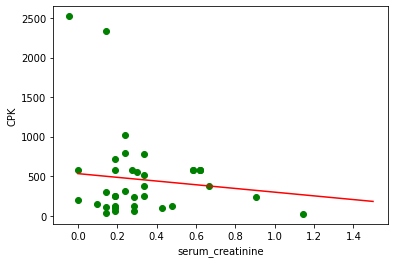

En la gráfica se puede observar que la recta de regresión se ajusta correctamente a los datos, aunque estos se encuentran muy dispersos, 
provocando que el error cuadrático medio sea muy alto.


In [68]:
# Visualización de resultados
X = np.linspace(0,1.5,100)
Y = w0 + w1*X # Recta de regresión

plt.scatter(scaled_test['serum_creatinine'],Y_test,color='g')
plt.plot(X, Y,color='r')
plt.xlabel('serum_creatinine')
plt.ylabel("CPK")
plt.show()

print("En la gráfica se puede observar que la recta de regresión se ajusta correctamente a los datos, aunque estos se encuentran muy dispersos, \nprovocando que el error cuadrático medio sea muy alto.")

##### Cuestiones 

a) ¿Cuál es la variable dependiente que podría considerar para abordar un problema de regresión lineal?

Podemos considerar calquiera que sea continua.

b) ¿Qué variable es la que permite mejor estimar la variable dependiente? Puede ayudarse en el valor del coeficiente de correlación, así como en alguna medida de prestación que considere adecuada para evaluar las prestaciones del regresor.

En nuestro caso, nos hemos basado en la matriz de correlación, el selector de caracteristicas, y los valores de R squared y MSE. Primero, hemos visto que variables eran las más significantes utilizando el selector, después, hemos hecho un filtrado utilizando la información de la matriz de correlación; de forma que hemos dejado las características cuya correlación con la variable dependiente era mayor. Una vez hecho esto, hemos probado a predecir la salida utilizando distintas características, seleccionando finalente las que devolvian un menor MSE y un mayor R squared.

c) Indique si las prestaciones obtenidas en el conjunto de test cambian tras normalizar las variables.

No deberían cambiar despues de realizar la normalización, ya que tenemos solo una variable.

### Regresor lineal multiple

In [69]:
# Regresión lineal simple multiple
regressor = LinearRegression()

# Entrenamos el modelo utilizando los datos de train
col = ["time", "age", "serum_creatinine"] # Basándonos en los resultados de la matriz de correlación y del selector de variables, hemos decidido usar estas tres variables,
# ya que time es la variable con menor pvalor, y las otras dos son las que mejor se correlacionan con esta variable
regressor = regressor.fit(scaled_train[col], Y_train)

# Mostramos el valor del intercepto (wo)
print(f"Valor del intercepto: {regressor.intercept_}")

# Mostramos el valor de los coeficientes
print(f"Valor de los coeficientes: {regressor.coef_}") 
# Del resultado podemos decir que a medida que aumenta el valor de CPK, disminuyen los valores de age y de serum_creatinine, mientras que los valores de time aumentan

# Obtenemos el valor predicho para el conjunto de test
y_pred = regressor.predict(np.array(scaled_test[col]))

#  Calculamos el error cuadrático medio
mse_m=metrics.mean_squared_error(Y_test, y_pred)
mse_results.append(mse_m)

# Calculamos R^2
r_squared_m=metrics.r2_score(Y_test, y_pred)
r2_results.append(r_squared_m)

# Calculamos el error cuadrático medio con validación cruzada
rmse_cv = cross_val_score(regressor, scaled_train[col], Y_train, scoring='neg_mean_squared_error', cv=3)
rmse_results_cv.append(np.mean(np.sqrt(np.abs(rmse_cv))))

# Calculamos R^2 con validación cruzada
r2_cv = cross_val_score(regressor, scaled_train[col], Y_train, scoring='r2', cv=3)
r2_results_cv.append(np.mean(np.abs(r2_cv)))

print(f'R Squared: {r_squared_m} \nMean Squared Error:{mse_m} \nRaíz cuadrada de MSE: {np.sqrt(mse_m)} \nR Squared con validación cruzada: {np.mean(np.abs(r2_cv))} \nRaíz del Mean Squared Error con validación cruzada: {np.mean(np.sqrt(np.abs(rmse_cv)))}')
print("Al aumentar el número de variables, la predicción se ha realizado de una manera mejor (ya que el MSE ha disminuido y el R squared ha aumentado), ya que estamos usando más información para predecir los valores de CPK, sin embargo \nla predicción sigue sin ser muy buena, ya que las variables no estan demasiado correlacionadas con la variable dependiente ni entre ellas")

Valor del intercepto: 273.8326083151454
Valor de los coeficientes: [ 735.67990161 -177.29891599  -68.55365463]
R Squared: 0.05977838334376262 
Mean Squared Error:259201.30907830753 
Raíz cuadrada de MSE: 509.1181680890081 
R Squared con validación cruzada: 0.19172524446569691 
Raíz del Mean Squared Error con validación cruzada: 576.6843776351643
Al aumentar el número de variables, la predicción se ha realizado de una manera mejor (ya que el MSE ha disminuido y el R squared ha aumentado), ya que estamos usando más información para predecir los valores de CPK, sin embargo 
la predicción sigue sin ser muy buena, ya que las variables no estan demasiado correlacionadas con la variable dependiente ni entre ellas


c:\Users\danie\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


### Regresion no lineal

#### Regresión polinómica

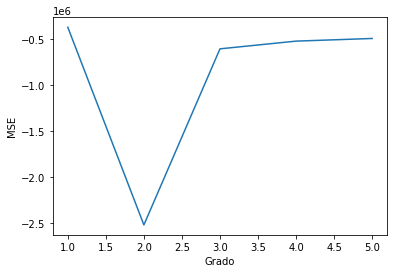

R Squared: -2.875307347986802 
Mean Squared Error:1068348.9082619355 
Raíz cuadrada de MSE: 1033.6096498494658 
Grado óptimo: 1 
R Squared con validación cruzada: -0.783816476784636 
Raíz del Mean Squared Error con validación cruzada: 717.4033850819366


In [70]:
from sklearn.preprocessing import PolynomialFeatures

# Usamos validación cruzada para encontrar el parámetro del grado del polinomio, asi evitamos el overfitting
cv_degree_scores=[]
d_values = range(1,6,1) # Grados de polinommio entre 1 y 6, utilizamos este rango ya que con un mayor grado, aumentan las probabilidades de cometer overfitting, además, la carga 
# computacional aumenta mucho, por lo que el modelo se hace mucho mas lento
for d in d_values:
    poly_reg = PolynomialFeatures(degree=d)
    X_train_poly = poly_reg.fit_transform(scaled_train)
    X_test_poly = poly_reg.transform(scaled_test)
    # Transformamos los conjuntos de entrenamiento y test para tener variables polinomicas
    pol_reg = LinearRegression()
    scores= cross_val_score(pol_reg, X_train_poly, Y_train, cv=3, scoring='neg_mean_squared_error') # Con el parametro cv = 3, estamos haciendo validacion cruzada con 3 particiones
    # Aqui se usa el error negativo, por eso va para abajo el grafico
    # Calculamos score en el sector de validacion y guardamos el valor de la media
    cv_degree_scores.append(scores.mean())
    
# Graficamos los resultados
plt.plot(d_values, cv_degree_scores)
plt.xlabel('Grado')
plt.ylabel('MSE')
plt.show()

# Entrenamos el modelo y predecimos con el grado del polinomio obtenido con cross-validation
# En la grafica anterior podemos observar que el grado optimo es 1, sin embargo, ya hemos realizado una predicción lineal. Por tanto, en este caso vamos a realizar 
# una predicción con polinomio de grado 4, para comprobar que el resultado es peor.
poly_reg = PolynomialFeatures(degree=4)
X_train_poly = poly_reg.fit_transform(scaled_train)
X_test_poly = poly_reg.transform(scaled_test)

# Entremos y predecimos
pol_reg = LinearRegression()
pol_reg.fit(X_train_poly, Y_train)
y_pred_pol=pol_reg.predict(X_test_poly)

# Calculamos el error cuadrático medio
mse_pol=metrics.mean_squared_error(Y_test, y_pred_pol)
mse_results.append(mse_pol)

# Calculamos R^2
r_squared_pol=metrics.r2_score(Y_test, y_pred_pol)
r2_results.append(r_squared_pol)

# Calculamos el error cuadrático medio con validación cruzada
rmse_cv = cross_val_score(pol_reg, X_train_poly, Y_train, scoring='neg_mean_squared_error', cv=3)
rmse_results_cv.append(np.mean(np.sqrt(np.abs(rmse_cv))))

# Calculamos R^2 con validación cruzada
r2_cv = cross_val_score(pol_reg, X_train_poly, Y_train, scoring='r2', cv=3)
r2_results_cv.append(np.mean(np.abs(r2_cv)))

# Seleccionamos el valor máximo 
print(f"R Squared: {r_squared_pol} \nMean Squared Error:{mse_pol} \nRaíz cuadrada de MSE: {np.sqrt(mse_pol)} \nGrado óptimo: {np.array(d_values)[cv_degree_scores.index(np.array(cv_degree_scores).max())]} \nR Squared con validación cruzada: {np.mean(r2_cv)} \nRaíz del Mean Squared Error con validación cruzada: {np.mean(np.sqrt(np.abs(rmse_cv)))}")

#### Regresión logaritmica

R Squared: 0.03878481379272447 
Mean Squared Error:264988.8389685559 
Raíz cuadrada de MSE: 514.7706663831535 
R Squared con validación cruzada: -0.19496856147595495 
Raíz del Mean Squared Error con validación cruzada: 597.5076548472955


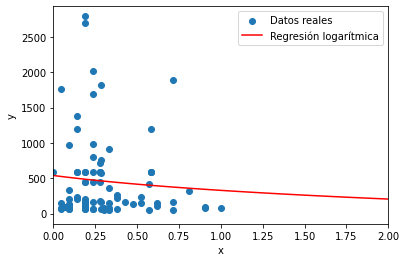

Como se puede observar, la predicción es bastante mala, ya que los datos están muy dispersos, y la recta de regresión no se ajusta bien a los datos.


In [71]:
# Aplica una transformación logarítmica a los datos
xtrain_log = round(np.log(scaled_train + 1), 6) # Sumamos 1 dentro del logaritmo para que no de error al ser 0

# Crea un modelo de regresión lineal
log_reg = LinearRegression()

# Ajusta el modelo a los datos
log_reg.fit(np.array(xtrain_log["serum_creatinine"]).reshape(-1, 1), Y_train)

# Realiza predicciones utilizando el modelo

xtest_log = np.log(scaled_test + 1) 

y_pred = log_reg.predict(np.array(xtest_log["serum_creatinine"]).reshape(-1, 1))

a = log_reg.coef_[0]
b = log_reg.intercept_

# Calculamos el error cuadrático medio
mse_log=metrics.mean_squared_error(Y_test, y_pred)
mse_results.append(mse_log)

# Calculamos R^2
r_squared_log=metrics.r2_score(Y_test, y_pred)
r2_results.append(r_squared_log)

# Calculamos el error cuadrático medio con validación cruzada
rmse_cv = cross_val_score(log_reg, np.array(xtrain_log["serum_creatinine"]).reshape(-1, 1), Y_train, scoring='neg_mean_squared_error', cv=3)
rmse_results_cv.append(np.mean(np.sqrt(np.abs(rmse_cv))))

# Calculamos R^2 con validación cruzada
r2_cv = cross_val_score(log_reg, np.array(xtrain_log["serum_creatinine"]).reshape(-1, 1), Y_train, scoring='r2', cv=3)
r2_results_cv.append(np.mean(r2_cv))

print(f'R Squared: {r_squared_log} \nMean Squared Error:{mse_log} \nRaíz cuadrada de MSE: {np.sqrt(mse_log)} \nR Squared con validación cruzada: {np.mean(r2_cv)} \nRaíz del Mean Squared Error con validación cruzada: {np.mean(np.sqrt(np.abs(rmse_cv)))}')


# Construimos la funcion logaritmica
x = np.linspace(0,5,100)
f = a*np.log(x + 1) + b

# Dibuja los datos y la línea de regresión
plt.scatter(scaled_train["serum_creatinine"], Y_train, label='Datos reales')
plt.plot(x, f, label='Regresión logarítmica', color='red')
plt.xlim(0,2)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

print("Como se puede observar, la predicción es bastante mala, ya que los datos están muy dispersos, y la recta de regresión no se ajusta bien a los datos.")

#### Regresión exponencial.

R Squared: 0.03450545921318693 
Mean Squared Error:266168.5760532776 
Raíz cuadrada de MSE: 515.9152799183967 
R Squared con validación cruzada: 0.156857868023905 
Raíz del Mean Squared Error con validación cruzada: 589.1503080670219


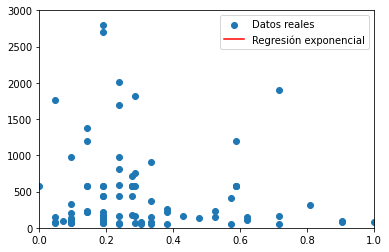

In [72]:
from scipy.optimize import curve_fit

# Transformamos los datos
xtrain_exp = np.exp(scaled_train["serum_creatinine"])

# Modelo de regresión lineal
exp_reg = LinearRegression()

# Ajustamos el modelo a los datos
exp_reg.fit(np.array(xtrain_exp).reshape(-1, 1), Y_train)

# Realizamos predicciones utilizando el modelo
xtest_exp = np.exp(scaled_test["serum_creatinine"])

y_pred = exp_reg.predict(np.array(xtest_exp).reshape(-1, 1))

a_optimizado = exp_reg.coef_[0]
b_optimizado = exp_reg.intercept_

# Calcula el error cuadrático medio
mse_exp=metrics.mean_squared_error(Y_test, y_pred)
mse_results.append(mse_exp)

# Calculamos R^2
r_squared_exp=metrics.r2_score(Y_test, y_pred)
r2_results.append(r_squared_exp)

# Calculamos el error cuadrático medio con validación cruzada
rmse_cv = cross_val_score(exp_reg, np.array(xtrain_exp).reshape(-1, 1), Y_train, scoring='neg_mean_squared_error', cv=3)
rmse_results_cv.append(np.mean(np.sqrt(np.abs(rmse_cv))))

# Calculamos R^2 con validación cruzada
r2_cv = cross_val_score(exp_reg, np.array(xtrain_exp).reshape(-1, 1), Y_train, scoring='r2', cv=3)
r2_results_cv.append(np.mean(r2_cv))

print(f'R Squared: {r_squared_exp} \nMean Squared Error:{mse_exp} \nRaíz cuadrada de MSE: {np.sqrt(mse_exp)} \nR Squared con validación cruzada: {np.mean(np.abs(r2_cv))} \nRaíz del Mean Squared Error con validación cruzada: {np.mean(np.sqrt(np.abs(rmse_cv)))}')
# Nos devuelve el mismo error que en la logaritmica porque se puede ajustar la exponencial como una logaritmica

x = np.linspace(0, 1, 100)
f = a_optimizado * np.exp(b_optimizado * x) # Función exponencial

# Gráfico de los datos y la curva ajustada
plt.scatter(scaled_train["serum_creatinine"], Y_train, label='Datos reales')
plt.plot(x, f, 'r-', label='Regresión exponencial')
plt.xlim(0,1)
plt.ylim(0,3000)
plt.legend()
plt.show()

Incluya qué funciones no lineales (logarítmica, inversa, cuadrática, cúbica, de
potencia, exponencial, etc.) se ajustan mejor a los datos disponibles.

El modelo que mejor se ajusta es el modelo de regresión logarítmica. Ya que es el que mejores figuras de mérito tiene.


### Regresion lineal con regularización

In [73]:
# Regresión Ridge 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
ridge = Ridge()

# Valores para alpha
parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20,30]}
# alpha es el parametro de regularizacion, cuanto mas grande sea, mas penaliza los coeficientes mas grandes, cogemos valores extremos para compararlos

# Seleccionamos el mejor valor de alpha
ridge_regression = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3) 
ridge_regression.fit(scaled_train, Y_train) 
print(f"El mejor valor de alpha es: {ridge_regression.best_params_['alpha']}")
# Como ya sabemos el mejor valor de alpha, creamos el modelo con ese valor

# Entrenamos

ridge = Ridge(alpha=ridge_regression.best_params_['alpha'])
ridge_regression = ridge.fit(scaled_train, Y_train)

print(f"El valor de los coeficientes para cada una de las variables es: {ridge_regression.coef_}")
# Las columnas son: ['age', 'anaemia', 'diabetes', 'ejection_fraction','high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium','sex', 'smoking', 'time']
# En este caso, las caracteristicas mas relevantes son anaemia, diabetes, sex, smoking y time. 

# Se obtiene la salida predicha
y_pred_ridge = ridge_regression.predict(scaled_test)

# Calculamos el error cuadrático medio
mse_ridge=metrics.mean_squared_error(Y_test, y_pred_ridge)
mse_results.append(mse_ridge)

# Calculamos R2
r_squared_ridge=metrics.r2_score(Y_test, y_pred_ridge)
r2_results.append(r_squared_ridge)

# Calculamos el error cuadrático medio con validación cruzada
rmse_cv = cross_val_score(ridge_regression, scaled_train, Y_train, scoring='neg_mean_squared_error', cv=3)
rmse_results_cv.append(np.mean(np.sqrt(np.abs(rmse_cv))))

# Calculamos R^2 con validación cruzada
r2_cv = cross_val_score(ridge_regression, scaled_train, Y_train, scoring='r2', cv=3)
r2_results_cv.append(np.mean(r2_cv))

print(f'R Squared: {r_squared_ridge} \nMean Squared Error:{mse_ridge} \nRaíz cuadrada de MSE: {np.sqrt(mse_ridge)} \nR Squared con validación cruzada: {np.mean(np.abs(r2_cv))} \nRaíz del Mean Squared Error con validación cruzada: {np.mean(np.sqrt(np.abs(rmse_cv)))}')


El mejor valor de alpha es: 10
El valor de los coeficientes para cada una de las variables es: [ -69.07951699 -176.40690222 -111.28159488  -94.76767017  -45.86756245
  -59.02509774  -53.28812775   65.16472156  115.75122215 -191.34701114
  308.91639551]
R Squared: -0.02948452357582987 
Mean Squared Error:283809.40350606287 
Raíz cuadrada de MSE: 532.7376497921495 
R Squared con validación cruzada: 0.029308714410078245 
Raíz del Mean Squared Error con validación cruzada: 544.90691046503


In [74]:
# LASSO

from sklearn.linear_model import Lasso

lasso = Lasso()

# Valores de alpha
parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20,30]}

# Grid search para lasso regression
lasso_regression = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regression.fit(scaled_train, Y_train)
print(f"El mejor valor de alpha es: {lasso_regression.best_params_['alpha']}")

# Entrenamos

lasso = Lasso(alpha=lasso_regression.best_params_['alpha'])
lasso_regression = lasso.fit(scaled_train, Y_train)

print(f"El valor de los coeficientes para cada una de las variables es: {lasso_regression.coef_}")
# Las columnas son: ['age', 'anaemia', 'diabetes', 'ejection_fraction','high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium','sex', 'smoking', 'time']
# En este caso, las caracteristicas mas relevantes son anaemia, diabetes ,sex, smoking y time. 
# En este caso, los coeficientes pueden ser cero, lo que indica que la variable no es relevante para el modelo. Esto ocurre porque Lasso realiza una regularizacion L1, que 
# disminuye los coeficientes que son muy grandes, llegando a hacerlos cero si es necesario.

# Obtenemos la salida predicha
y_pred_lasso = lasso_regression.predict(scaled_test)

# Calculamos el error cuadrático medio
mse_lasso=metrics.mean_squared_error(Y_test, y_pred_lasso)
mse_results.append(mse_lasso)

# Calculamos R2
r_squared_lasso=metrics.r2_score(Y_test, y_pred_lasso)
r2_results.append(r_squared_lasso)

# Calculamos el error cuadrático medio con validación cruzada
rmse_cv = cross_val_score(lasso_regression, scaled_train, Y_train, scoring='neg_mean_squared_error', cv=3)
rmse_results_cv.append(np.mean(np.sqrt(np.abs(rmse_cv))))

# Calculamos R^2 con validación cruzada
r2_cv = cross_val_score(lasso_regression, scaled_train, Y_train, scoring='r2', cv=3)
r2_results_cv.append(np.mean(r2_cv))

print(f'R Squared: {r_squared_lasso} \nMean Squared Error:{mse_lasso} \nRaíz cuadrada de MSE: {np.sqrt(mse_lasso) } \nR Squared con validación cruzada: {np.mean(np.abs(r2_cv))} \nRaíz del Mean Squared Error con validación cruzada: {np.mean(np.sqrt(np.abs(rmse_cv)))}')

c:\Users\danie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.381e+06, tolerance: 1.247e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\danie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.747e+06, tolerance: 2.233e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\danie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.888e+06, toleranc

El mejor valor de alpha es: 20
El valor de los coeficientes para cada una de las variables es: [  -0.         -159.8106934   -89.88238144   -0.           -0.
   -0.           -0.            0.          100.05822868 -177.45346975
  514.04226239]
R Squared: -0.0501299110576654 
Mean Squared Error:289500.94618804444 
Raíz cuadrada de MSE: 538.0529213637302 
R Squared con validación cruzada: 0.05681341902989723 
Raíz del Mean Squared Error con validación cruzada: 564.8244416974513


In [75]:
# Elastic Net

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet()

# Elastic net es una combinación de ridge y lasso, además de buscar alpha, también deberemos encontrar la proporcion de ridge y lasso óptima para el modelo
# Valores de alpha y l1_ratio
parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20,30], "l1_ratio": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

# Grid search para elastic net
elastic_net_regression = GridSearchCV(elastic_net, parameters, scoring='neg_mean_squared_error', cv=3)
elastic_net_regression.fit(scaled_train, Y_train)

print(f"El mejor valor de alpha es: {elastic_net_regression.best_params_['alpha']}")
print(f"El mejor valor de l1_ratio es: {elastic_net_regression.best_params_['l1_ratio']}") # UN valor de 0.8 indica que lasso tiene mucho más peso que ridge

# Entrenamos

elastic_net = ElasticNet(alpha=elastic_net_regression.best_params_['alpha'], l1_ratio=elastic_net_regression.best_params_['l1_ratio'])
elastic_net_regression = elastic_net.fit(scaled_train, Y_train)

print(f"El valor de los coeficientes para cada una de las variables es: {elastic_net_regression.coef_}")
# Las columnas son: ['age', 'anaemia', 'diabetes', 'ejection_fraction','high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium','sex', 'smoking', 'time']
# Las caracteristicas mas relevantes son anaemia, diabetes ,sex, smoking y time, las mismas que para ridge y LASSO. 

# Obtenemos la salida predicha
y_pred_elastic_net = elastic_net_regression.predict(scaled_test)

# Calculamos el error cuadrático medio
mse_elastic_net=metrics.mean_squared_error(Y_test, y_pred_elastic_net)
mse_results.append(mse_elastic_net)

# Calculamos R2
r_squared_elastic_net=metrics.r2_score(Y_test, y_pred_elastic_net)
r2_results.append(r_squared_elastic_net)

# Calculamos el error cuadrático medio con validación cruzada
rmse_cv = cross_val_score(elastic_net_regression, scaled_train, Y_train, scoring='neg_mean_squared_error', cv=3)
rmse_results_cv.append(np.mean(np.sqrt(np.abs(rmse_cv))))

# Calculamos R^2 con validación cruzada
r2_cv = cross_val_score(elastic_net_regression, scaled_train, Y_train, scoring='r2', cv=3)
r2_results_cv.append(np.mean(r2_cv))

print(f'R Squared: {r_squared_elastic_net} \nMean Squared Error:{mse_elastic_net} \nRaíz cuadrada de MSE: {np.sqrt(mse_elastic_net)} \nR Squared con validación cruzada: {np.mean(np.abs(r2_cv))} \nRaíz del Mean Squared Error con validación cruzada: {np.mean(np.sqrt(np.abs(rmse_cv)))}')

c:\Users\danie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.936e+06, tolerance: 1.247e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\danie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.947e+06, tolerance: 2.233e+03
  model = cd_fast.enet_coordinate_descent(
c:\Users\danie\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.488e+06, toleranc

El mejor valor de alpha es: 1
El mejor valor de l1_ratio es: 0.8
El valor de los coeficientes para cada una de las variables es: [ -49.10547905 -137.68741614  -83.18424207  -58.7774027   -39.67927452
  -31.63002541  -33.52985601   39.34697158   79.64208975 -136.82124022
  215.14442802]
R Squared: 0.002828509363624887 
Mean Squared Error:274901.31174362963 
Raíz cuadrada de MSE: 524.3103200811802 
R Squared con validación cruzada: 0.02984005705988335 
Raíz del Mean Squared Error con validación cruzada: 544.9266806329402


Indique si las figuras de mérito obtenidas en el conjunto de test cambian al
cambiar la regularización considerada.

Si cambian, en LASSO tenemos el mayor MSE y el menor R squared utilizando la regularización L1, y en Elastic Net tenemos los mejores resultados, ya que combinamos las regularizaciones utilizadas en Ridge y en LASSO para dar lugar a un modelo óptimo.

### Comparación de los resultados obtenidos

In [76]:
results = pd.DataFrame()

results["R2 en el conjunto de test"] = r2_results
results["MSE en el conjunto de test"] = mse_results
results["Raíz MSE en el conjunto de test"] = np.sqrt(mse_results)
results["R2 con validación cruzada"] = r2_results_cv
results["Raíz MSE con validación cruzada"] = rmse_results_cv

#results
results["Models"] = ["Regresión lineal", "RL multivariable", "Regresión no lineal (polinómica)", "Regresión no lineal (logartimica)",
"Regresión no lineal (exponencial)" , "Rigde", "Lasso", "Elastic Net"]
results.set_index("Models", inplace = True)

results

,R2 en el conjunto de test,MSE en el conjunto de test,Raíz MSE en el conjunto de test,R2 con validación cruzada,Raíz MSE con validación cruzada
Models,,,,,
Regresión lineal,0.036589,2.655941e+05,515.358264,0.182261,594.707928
RL multivariable,0.059778,2.592013e+05,509.118168,0.191725,576.684378
Regresión no lineal (polinómica),-2.875307,1.068349e+06,1033.609650,0.783816,717.403385
Regresión no lineal (logartimica),0.038785,2.649888e+05,514.770666,-0.194969,597.507655
Regresión no lineal (exponencial),0.034505,2.661686e+05,515.915280,-0.156858,589.150308
Rigde,-0.029485,2.838094e+05,532.737650,0.029309,544.906910
Lasso,-0.050130,2.895009e+05,538.052921,-0.056813,564.824442
Elastic Net,0.002829,2.749013e+05,524.310320,0.029840,544.926681


De los resultados podemos conluir que lo mejor es utilizar un modelo de regresión lineal multivariable ya que nos roporciona el menor error en el conjunto de test así como el mayor valor de R squared. Este resultado se puede deber a la dificultad de predecir los valroes de la CPK con tan pocos datos y variables tan poco correlacionadas.

In [77]:
# A continuacion, vamos a realizar una predicción con el modelo de regresion lineal mutivariable usando una partición diferente

x_train, x_test, y_train, y_test = train_test_split(data_input, data_output, test_size=0.3, random_state = 89318)

# Normalizamos los datos del conjunto train

x_res_train = x_train.copy()

scaler = preprocessing.MinMaxScaler()

data_minmax = scaler.fit_transform(x_res_train)

scaled_train = pd.DataFrame(data_minmax, columns=x_res_train.columns)

# Normalizamos el conjunto de test

x_res_test = x_test.copy()

data_minmax = scaler.transform(x_res_test)

scaled_test = pd.DataFrame(data_minmax, columns=x_res_test.columns)

# Regresión lineal simple multiple
regressor_ = LinearRegression()

# Entrenamos el modelo utilizando los datos de train
col = ["time", "age", "serum_creatinine"] 
regressor_ = regressor_.fit(scaled_train[col], Y_train)

# Mostramos el valor del intercepto (wo)
print(f"Valor del intercepto: {regressor_.intercept_}")

# Mostramos el valor de los coeficientes
print(f"Valor de los coeficientes: {regressor_.coef_}") 

# Obtenemos el valor predicho para el conjunto de test
y_pred = regressor_.predict(np.array(scaled_test[col]))

#  Calculamos el error cuadrático medio
mse_m=metrics.mean_squared_error(Y_test, y_pred)
mse_results.append(mse_m)

# Calculamos R^2
r_squared_m=metrics.r2_score(Y_test, y_pred)
r2_results.append(r_squared_m)

print(f'R Squared: {r_squared_m} \nMean Squared Error:{mse_m} \nRaíz cuadrada de MSE: {np.sqrt(mse_m)}')


Valor del intercepto: 230.7369753713326
Valor de los coeficientes: [101.73127348 461.94619981 -21.50082113]
R Squared: -0.10525635008760847 
Mean Squared Error:304698.2623401693 
Raíz cuadrada de MSE: 551.9948028198901


c:\Users\danie\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [78]:
# En este caso, vamos a usar el predictor que hemos entrenado al principio con la particion que acabamos de hacer

y_pred = regressor.predict(np.array(scaled_test[col]))

#  Calculamos el error cuadrático medio
mse_m=metrics.mean_squared_error(Y_test, y_pred)
mse_results.append(mse_m)

# Calculamos R^2
r_squared_m=metrics.r2_score(Y_test, y_pred)
r2_results.append(r_squared_m)

print(f'R Squared: {r_squared_m} \nMean Squared Error:{mse_m} \nRaíz cuadrada de MSE: {np.sqrt(mse_m)}')

# Podemos comprobar que el resultado es peor ya que hemos entrenado el regresor con un conjunto de datos que no es el mismo que el que estamos usando para predecir, por esto 
# el error es mayor

R Squared: -0.187583370602173 
Mean Squared Error:327394.2641251334 
Raíz cuadrada de MSE: 572.1837677924229


c:\Users\danie\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# Tema 3

In [79]:
# Cargamos los datos y hacemos la partición

data_c = data_input.copy()
data_c["creatinine_phosphokinase"] = data_output
data_c_output = data["DEATH_EVENT"]

X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(data_c, data_c_output, test_size=0.3, random_state = 777)


### Normalizamos

In [80]:
# Normalizamos el conjunto de train
X_res_train_c = X_train_c.copy()

scaler = preprocessing.MinMaxScaler()

# Todos los valores están en el rango [0,1]
data_minmax_c = scaler.fit_transform(X_res_train_c)

scaled_train_c = pd.DataFrame(data_minmax_c, columns=X_res_train_c.columns)
scaled_train_c.describe()

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,creatinine_phosphokinase
count,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000,88.000000
mean,0.426377,0.454545,0.420455,0.433949,0.454545,0.392704,0.301510,0.597403,0.613636,0.295455,0.387736,0.151371
std,0.233717,0.500783,0.496461,0.244455,0.500783,0.164162,0.214593,0.194123,0.489706,0.458861,0.293012,0.210482
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.272727,0.000000,0.000000,0.270833,0.000000,0.296739,0.190476,0.476190,0.000000,0.000000,0.101887,0.019476
50%,0.387882,0.000000,0.000000,0.437500,0.000000,0.391304,0.238095,0.619048,1.000000,0.000000,0.313208,0.057881
75%,0.545455,1.000000,1.000000,0.583333,1.000000,0.441848,0.345238,0.714286,1.000000,1.000000,0.679245,0.194758
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [81]:
# Normalizamos el conjunto de test

X_res_test_c = X_test_c.copy()

data_minmax_c = scaler.transform(X_res_test_c)

scaled_test_c = pd.DataFrame(data_minmax_c, columns=X_res_test_c.columns)
scaled_test_c.describe()

,age,anaemia,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,creatinine_phosphokinase
count,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000,38.000000
mean,0.417544,0.500000,0.500000,0.398026,0.447368,0.411654,0.322989,0.550937,0.684211,0.263158,0.354121,0.153268
std,0.243465,0.506712,0.506712,0.239493,0.503897,0.215505,0.247220,0.157426,0.471069,0.446258,0.291629,0.193703
min,0.000000,0.000000,0.000000,-0.041667,0.000000,-0.056522,-0.047619,0.190476,0.000000,0.000000,-0.007547,-0.008737
25%,0.181818,0.000000,0.000000,0.270833,0.000000,0.288043,0.190476,0.440476,0.000000,0.000000,0.100943,0.028668
50%,0.436364,0.500000,0.500000,0.375000,0.000000,0.406911,0.257143,0.571429,1.000000,0.000000,0.273585,0.094467
75%,0.595455,1.000000,1.000000,0.479167,1.000000,0.529891,0.404762,0.666667,1.000000,0.750000,0.583962,0.194758
max,1.000000,1.000000,1.000000,0.895833,1.000000,0.843478,1.142857,0.857143,1.000000,1.000000,0.898113,0.900983


### Regresión logística simple

In [82]:
# Primero vamos a observar la matriz de correlacion para saber que variables estan mas correladas con la variable dependiente

datos_a_correlar = scaled_train_c.copy()
datos_a_correlar["DEATH_EVENT"] = Y_train_c

# Mostramos la matriz de correlacion para saber que datos están mas correlados con la variable dependiente
correlacion = datos_a_correlar.corr()
print(correlacion)

from sklearn.feature_selection import SelectKBest, chi2

selectKBest = SelectKBest(chi2, k=3)
selectKBest.fit(scaled_train_c, Y_train_c)
indices_seleccionados = selectKBest.get_support()
caracteristicas = scaled_train_c.columns
print(f"Caracteristicas seleccionadas: {caracteristicas[indices_seleccionados]}")

#Utilizando este metodo, podemos ver que variables son las que han obtenido scores y pvalues mas relevantes, y por lo tanto las que se han elegido
#utilizando SelectKBest. Esta funcion solo tiene en cuenta la relacion de las variables con la variable dependiente, no tiene en cuenta la relacion entre las distintas variables independientes

#print(selectKBest.scores_)
#print(selectKBest.pvalues_)

                               age   anaemia  diabetes  ejection_fraction  \
age                       1.000000 -0.022076 -0.046849           0.161716   
anaemia                  -0.022076  1.000000 -0.130291           0.093537   
diabetes                 -0.046849 -0.130291  1.000000          -0.088185   
ejection_fraction         0.161716  0.093537 -0.088185           1.000000   
high_blood_pressure       0.017207 -0.100000  0.147103          -0.117722   
platelets                -0.044028 -0.208629  0.075807           0.026037   
serum_creatinine          0.169503  0.024839 -0.032745          -0.279697   
serum_sodium             -0.084807  0.017915 -0.069185           0.233609   
sex                       0.278750 -0.072436 -0.127866          -0.135614   
smoking                   0.283108 -0.140967 -0.097472          -0.127167   
time                     -0.139400 -0.070352  0.054342          -0.023411   
creatinine_phosphokinase -0.127952 -0.202837 -0.112569          -0.110281   

Valor del intercepto: 0.5846960614153359
Valor del coeficiente B1: -2.034245520030937
Accuracy del modelo: 0.79
Precisión del modelo: 0.89
Sensibilidad del modelo: 0.74
F1 score del modelo: 0.81
Accuracy del modelo con validación cruzada: 0.76
Precisión del modelo con validación cruzada: 0.76
Sensibilidad del modelo con validación cruzada: 0.70
F1 score del modelo con validación cruzada: 0.72


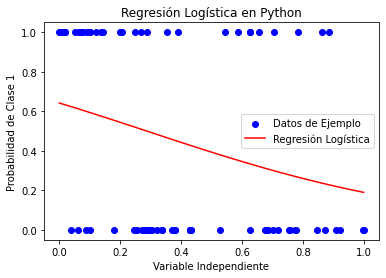

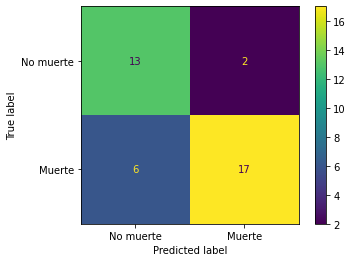

In [83]:
# Basándonos en los datos obtenidos en la matriz de correlacion, en los resultados obtenidos en SelectKBest y en varias pruebas que hemos realizado, 
# decidimos utilzar time como variable independiente
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

acc_results_c=[] # accuracy
prec_results_c=[] # precision
recall_results_c=[] # recall
f1_results_c=[] # f1 score
acc_results_c_cv = [] # accuracy con validacion cruzada
prec_results_c_cv = [] # precision con validacion cruzada
recall_results_c_cv = [] # recall con validacion cruzada
f1_results_c_cv = [] # f1 score con validacion cruzada

# Regresión logistica simple
regressor = LogisticRegression()

# Entrenamos el modelo utilizando los datos de train
regressor = regressor.fit(np.array(scaled_train_c['time']).reshape(-1, 1), Y_train_c)

# Mostramos el valor del intercepto (Bo)
B0 = regressor.intercept_
print(f"Valor del intercepto: {B0[0]}")

# Mostramos el valor de los coeficientes (B1)
B1 = regressor.coef_ # Si B1 es negativo, la probabilidad de que el paciente muera aumenta a medida que disminuye el valor de time
print(f"Valor del coeficiente B1: {B1[0][0]}")

# Obtenemos el valor predicho para el conjunto de test
y_pred = regressor.predict(np.array(scaled_test_c['time']).reshape(-1,1))

#Calculamos el accuracy
accuracy = accuracy_score(Y_test_c, y_pred)
print(f'Accuracy del modelo: {accuracy:.2f}')
acc_results_c.append(accuracy)

#Calculamos la precisión
precision = metrics.precision_score(Y_test_c, y_pred)
print(f'Precisión del modelo: {precision:.2f}')
prec_results_c.append(precision)

#Calculamos la sensibilidad
recall = metrics.recall_score(Y_test_c, y_pred)
print(f'Sensibilidad del modelo: {recall:.2f}')
recall_results_c.append(recall)
# En nuestro modelo, estamos tratando de predecir si un paciente va a tener un fallo cardiaco que le provoque la muerte, por lo que la métrica más importante 
# será la sensibilidad, que mide la capacidad del modelo para predecir correctamente los casos positivos. El resto de métricas pasarán a un segundo plano

#Calculamos el f1 score
f1 = metrics.f1_score(Y_test_c, y_pred)
print(f'F1 score del modelo: {f1:.2f}')
f1_results_c.append(f1)

# Calculamos el accuracy con validación cruzada
acc_cv = cross_val_score(regressor, np.array(scaled_train_c['time']).reshape(-1, 1), Y_train_c, scoring='accuracy', cv=3)
acc_results_c_cv.append(np.mean(acc_cv))
print(f'Accuracy del modelo con validación cruzada: {np.mean(acc_cv):.2f}')

# Calculamos la precisión con validación cruzada
prec_cv = cross_val_score(regressor, np.array(scaled_train_c['time']).reshape(-1, 1), Y_train_c, scoring='precision', cv=3)
prec_results_c_cv.append(np.mean(prec_cv))
print(f'Precisión del modelo con validación cruzada: {np.mean(prec_cv):.2f}')

# Calculamos la sensibilidad con validación cruzada
recall_cv = cross_val_score(regressor, np.array(scaled_train_c['time']).reshape(-1, 1), Y_train_c, scoring='recall', cv=3)
recall_results_c_cv.append(np.mean(recall_cv))
print(f'Sensibilidad del modelo con validación cruzada: {np.mean(recall_cv):.2f}')

# Calculamos el f1 score con validación cruzada
f1_cv = cross_val_score(regressor, np.array(scaled_train_c['time']).reshape(-1, 1), Y_train_c, scoring='f1', cv=3)
f1_results_c_cv.append(np.mean(f1_cv))
print(f'F1 score del modelo con validación cruzada: {np.mean(f1_cv):.2f}')

# Creamos la curva de regresión
X = np.linspace(0,1,100)
Y = 1/(1+np.exp(-(B0[0] + B1[0][0]*X)))

plt.scatter(scaled_train_c["time"], Y_train_c, color='blue', label='Datos de Ejemplo')
plt.plot(X, Y, color='red', label='Regresión Logística') # TODO: Mandar este codigo a cristinna
plt.xlabel('Variable Independiente')
plt.ylabel('Probabilidad de Clase 1')
plt.title('Regresión Logística en Python')
plt.legend()
plt.show()

#También podemos observar la matriz de confusión
# El objetivo de nuestro modelo, es predecir la muerte de un paciente, por lo tanto, lo que mas nos interesa es que los casos de muerte se predigan correctamente, 
# por lo tanto, nos interesa que la sensibilidad sea lo mas alta posible

ConfusionMatrixDisplay(confusion_matrix(Y_test_c, y_pred), display_labels=["No muerte", "Muerte"]).plot()
# Observandola, podemos apreciar que casi todos los casos de No Muerte, son predichos correctamente, mientras que en los casos de Muerte, 
# se predice correctamente el 75% de los casos (aproximadamente)

Cuestiones 

¿Cuál es la variable dependiente que se podría considerar para abordar un problema
de clasificación?
Se podría considerar cualquier variable binaria o categórica.

¿Qué variable es la que permite una mejor estimación de la variable dependiente?
En nuestro caso, la variable que mejor predice los resultados es la variable time. Para hallar que variables son las que consiguen un mejor resultado, nos hemos basado en los resultados obtenidos utilizando selectKBest y en los resultados de la matriz de correlación. Una vez hemos visto qeu variables son las más significantes a la hora de predecir, hemos visto cuál de ellas era la que mejor sensibilidad aportaba.

### Regresión logística multivariable

Valor del intercepto: 0.7439005153379203
Valor de los coeficientes: [[ 1.50316134 -1.4271214  -2.01941889]]
Accuracy del modelo: 0.8157894736842105
Precisión del modelo: 0.9444444444444444
Sensibilidad del modelo: 0.7391304347826086
F1 score del modelo: 0.8292682926829269
Accuracy del modelo con validación cruzada: 0.7735632183908047
Precisión del modelo con validación cruzada: 0.832977207977208
Sensibilidad del modelo con validación cruzada: 0.6282051282051282
F1 score del modelo con validación cruzada: 0.707172054998142


c:\Users\danie\anaconda3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


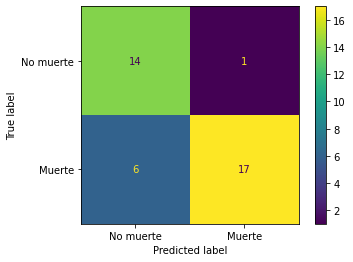

In [84]:
# Regresión logistico simple multiple
regressor = LogisticRegression()

# Entrenamos el modelo utilizando los datos de train
col = ["serum_creatinine", "ejection_fraction", "time"]
# Cuantas más variables usemos, más información se tendrá en cuenta a la hora de predecir la salida del modelo, pero también podemos caer en overfitting. Además,
# es importante no escoger variables que esten demasiado correladas entre si, ya que podríamos tener problemas de multicolinealidad.
regressor = regressor.fit(scaled_train_c[col], Y_train_c)

# Mostramos el valor del intercepto (wo)
print(f"Valor del intercepto: {regressor.intercept_[0]}")

# Mostramos el valor de los coeficientes (w1)
print(f"Valor de los coeficientes: {regressor.coef_}") # Del resultado podemos decir que a medida que aumenta el valor de serum, aumenta la probabilidad de que el paciente muera, 
# y a medida que aumenta el valor de ejection_fraction y el de time, disminuye la probabilidad de que el paciente muera 

# Obtenemos el valor predicho para el conjunto de test
y_pred = regressor.predict(np.array(scaled_test_c[col]))

#Calculamos el accuracy
accuracy_m = accuracy_score(Y_test_c, y_pred)
print(f'Accuracy del modelo: {accuracy_m}')
acc_results_c.append(accuracy_m)

#Calculamos la precisión
precision_m = metrics.precision_score(Y_test_c, y_pred)
print(f'Precisión del modelo: {precision_m}')
prec_results_c.append(precision_m)

#Calculamos el recall
recall_m = metrics.recall_score(Y_test_c, y_pred)
print(f'Sensibilidad del modelo: {recall_m}')
recall_results_c.append(recall_m)

#Calculamos el f1 score
f1_m = metrics.f1_score(Y_test_c, y_pred)
print(f'F1 score del modelo: {f1_m}')
f1_results_c.append(f1_m)

# Calculamos el accuracy con validación cruzada
acc_cv = cross_val_score(regressor, scaled_train_c[col], Y_train_c, scoring='accuracy', cv=3)
acc_results_c_cv.append(np.mean(acc_cv))
print(f'Accuracy del modelo con validación cruzada: {np.mean(acc_cv)}')

# Calculamos la precisión con validación cruzada
prec_cv = cross_val_score(regressor, scaled_train_c[col], Y_train_c, scoring='precision', cv=3)
prec_results_c_cv.append(np.mean(prec_cv))
print(f'Precisión del modelo con validación cruzada: {np.mean(prec_cv)}')

# Calculamos la sensibilidad con validación cruzada
recall_cv = cross_val_score(regressor, scaled_train_c[col], Y_train_c, scoring='recall', cv=3)
recall_results_c_cv.append(np.mean(recall_cv))
print(f'Sensibilidad del modelo con validación cruzada: {np.mean(recall_cv)}')

# Calculamos el f1 score con validación cruzada
f1_cv = cross_val_score(regressor, scaled_train_c[col], Y_train_c, scoring='f1', cv=3)
f1_results_c_cv.append(np.mean(f1_cv))
print(f'F1 score del modelo con validación cruzada: {np.mean(f1_cv)}')

# Podemos observar la matriz de confusión

ConfusionMatrixDisplay(confusion_matrix(Y_test_c, y_pred), display_labels=["No muerte", "Muerte"]).plot()
# Observandola, podemos apreciar que la mayoría de los casos de No Muerte, son predichos correctamente, mientras que en los casos de Muerte, 
# se predice correctamente en casi todos los casos

### Regularización logística

El mejor valor de alpha es: 30
El valor de los coeficientes para cada una de las variables es: [[ 0.05281118 -0.0461924  -0.02574795 -0.18352062 -0.01777748 -0.0110546
   0.1930172  -0.09284928  0.11364166  0.01108874 -0.28942297 -0.00699363]]
Accuracy del modelo: 0.631578947368421
Precisión del modelo: 0.9090909090909091
Sensibilidad del modelo: 0.43478260869565216
F1 score del modelo: 0.5882352941176471
Accuracy del modelo con validación cruzada: 0.6938697318007662
Precisión del modelo con validación cruzada: 0.8055555555555555
Sensibilidad del modelo con validación cruzada: 0.4249084249084249
F1 score del modelo con validación cruzada: 0.5455283562700443


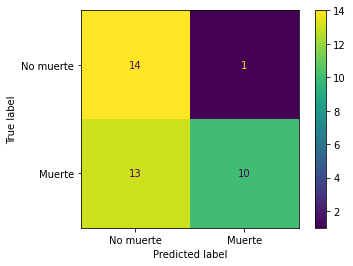

In [85]:
#Ridge
from sklearn.linear_model import RidgeClassifier
ridge = RidgeClassifier()

# Valores para alpha
parameters = {"alpha":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20,30]}
# alpha es el parametro de regularizacion, cuanto mas grande sea, mas penaliza los coeficientes mas grandes, cogemos valores extremos para compararlos

# Seleccionamos el mejor valor de alpha
ridge_regression = GridSearchCV(ridge, parameters, scoring='accuracy', cv=3) # En este caso usamos scoring=accuracy porque estamos en un problema de clasificación y no de regresión
ridge_regression.fit(scaled_train_c, Y_train_c)
print(f"El mejor valor de alpha es: {ridge_regression.best_params_['alpha']}")
# Como ya sabemos el mejor valor de alpha, creamos el modelo con ese valor

# Entrenamos

ridge = RidgeClassifier(alpha=ridge_regression.best_params_['alpha'])
ridge_regression = ridge.fit(scaled_train_c, Y_train_c)

print(f"El valor de los coeficientes para cada una de las variables es: {ridge_regression.coef_}")
# Las columnas son: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction','high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium','sex', 'smoking', 'time']
# Las caracteristicas mas relevantes según ridge son diabetes, smoking y platelets

# Se obtiene la salida predicha
y_pred_ridge = ridge_regression.predict(scaled_test_c)

# Calculamos la exactitud
accuracy_r = accuracy_score(Y_test_c, y_pred_ridge)
print(f'Accuracy del modelo: {accuracy_r}')
acc_results_c.append(accuracy_r)

# Calculamos la precisión
precision_r = metrics.precision_score(Y_test_c, y_pred_ridge)
print(f'Precisión del modelo: {precision_r}')
prec_results_c.append(precision_r)

# Calculamos el recall
recall_r = metrics.recall_score(Y_test_c, y_pred_ridge)
print(f'Sensibilidad del modelo: {recall_r}')
recall_results_c.append(recall_r)

# Calculamos el f1 score
f1_r = metrics.f1_score(Y_test_c, y_pred_ridge)
print(f'F1 score del modelo: {f1_r}')
f1_results_c.append(f1_r)

# Calculamos el accuracy con validación cruzada
acc_cv = cross_val_score(ridge_regression, scaled_train_c, Y_train_c, scoring='accuracy', cv=3)
acc_results_c_cv.append(np.mean(acc_cv))
print(f'Accuracy del modelo con validación cruzada: {np.mean(acc_cv)}')

# Calculamos la precisión con validación cruzada
prec_cv = cross_val_score(ridge_regression, scaled_train_c, Y_train_c, scoring='precision', cv=3)
prec_results_c_cv.append(np.mean(prec_cv))
print(f'Precisión del modelo con validación cruzada: {np.mean(prec_cv)}')

# Calculamos la sensibilidad con validación cruzada
recall_cv = cross_val_score(ridge_regression, scaled_train_c, Y_train_c, scoring='recall', cv=3)
recall_results_c_cv.append(np.mean(recall_cv))
print(f'Sensibilidad del modelo con validación cruzada: {np.mean(recall_cv)}')

# Calculamos el f1 score con validación cruzada
f1_cv = cross_val_score(ridge_regression, scaled_train_c, Y_train_c, scoring='f1', cv=3)
f1_results_c_cv.append(np.mean(f1_cv))
print(f'F1 score del modelo con validación cruzada: {np.mean(f1_cv)}')

#También podemos observar la matriz de confusión

ConfusionMatrixDisplay(confusion_matrix(Y_test_c, y_pred_ridge), display_labels=["No muerte", "Muerte"]).plot()


El mejor valor de C es: 1
El valor de los coeficientes para cada una de las variables es: [[ 0.          0.          0.         -1.1478762   0.          0.
   2.64895143  0.          0.47078567  0.         -2.38691269  0.        ]]
Accuracy del modelo: 0.8157894736842105
Precisión del modelo: 0.9
Sensibilidad del modelo: 0.782608695652174
F1 score del modelo: 0.8372093023255814
Accuracy del modelo con validación cruzada: 0.7275862068965516
Precisión del modelo con validación cruzada: 0.7191951566951568
Sensibilidad del modelo con validación cruzada: 0.6758241758241758
F1 score del modelo con validación cruzada: 0.6872169975618251


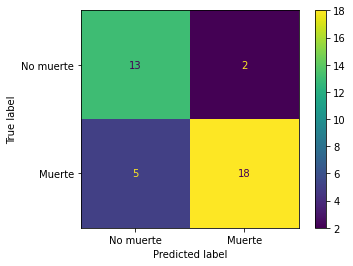

In [86]:
# LASSO

lasso = LogisticRegression(penalty="l1", solver='liblinear')
#Como el modelo LASSO no es el óptimo para los problemas de clasificación, se utiliza la regresión logística con el parámetro penalty="l1", este parametro indica 
# el tipo de penalización que se va a utilizar a la hora de calcular la función de coste, en este caso, l1 es la penalización que se aplica en LASSO
# También es necesario cambiar el solver del método para que funcione con nuestra penalización. Entre los posibles (liblinear y saga), nos quedamos con liblinear ya que es
# el que mejores resultados da en los casos en los que se tienen pocos datos

# Valores de C. C es el inverso de alpha, como LogisticRegression tiene C en lugar de alpha, es necesario encontrar el valor óptimo de C en lugar del de alpha
parameters = {"C":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20,30]}


# Grid search para lasso regression
lasso_regression = GridSearchCV(lasso, parameters, scoring='accuracy', cv=3)
lasso_regression.fit(scaled_train_c, Y_train_c)
print(f"El mejor valor de C es: {lasso_regression.best_params_['C']}")

# Entrenamos con el mejor C

lasso = LogisticRegression(penalty = "l1", solver = "liblinear", C=lasso_regression.best_params_['C'])
lasso_regression = lasso.fit(scaled_train_c, Y_train_c)

print(f"El valor de los coeficientes para cada una de las variables es: {lasso_regression.coef_}")
# Las columnas son: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction','high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium','sex', 'smoking', 'time']
# Como podemos observar en el valor de los coeficientes, las variables qeu tienen un 0 de coeficiente son las que menos influyen, por esto no se tienen en cuenta. 
# En nuestro caso son: age, anaemia, creatinine_phosphokinase, ejection_fraction, time, sex y serum_creatinine.

# Obtenemos la salida predicha
y_pred_lasso = lasso_regression.predict(scaled_test_c)

# Calculamos el accuracy
accuracy_l = accuracy_score(Y_test_c, y_pred_lasso)
print(f'Accuracy del modelo: {accuracy_l}')
acc_results_c.append(accuracy_l)

# Calculamos la precisión
precision_l = metrics.precision_score(Y_test_c, y_pred_lasso)
print(f'Precisión del modelo: {precision_l}')
prec_results_c.append(precision_l)

# Calculamos el recall
recall_l = metrics.recall_score(Y_test_c, y_pred_lasso)
print(f'Sensibilidad del modelo: {recall_l}')
recall_results_c.append(recall_l)

# Calculamos el f1 score
f1_l = metrics.f1_score(Y_test_c, y_pred_lasso)
print(f'F1 score del modelo: {f1_l}')
f1_results_c.append(f1_l)

# Calculamos el accuracy con validación cruzada
acc_cv = cross_val_score(lasso_regression, scaled_train_c, Y_train_c, scoring='accuracy', cv=3)
acc_results_c_cv.append(np.mean(acc_cv))
print(f'Accuracy del modelo con validación cruzada: {np.mean(acc_cv)}')

# Calculamos la precisión con validación cruzada
prec_cv = cross_val_score(lasso_regression, scaled_train_c, Y_train_c, scoring='precision', cv=3)
prec_results_c_cv.append(np.mean(prec_cv))
print(f'Precisión del modelo con validación cruzada: {np.mean(prec_cv)}')

# Calculamos la sensibilidad con validación cruzada
recall_cv = cross_val_score(lasso_regression, scaled_train_c, Y_train_c, scoring='recall', cv=3)
recall_results_c_cv.append(np.mean(recall_cv))
print(f'Sensibilidad del modelo con validación cruzada: {np.mean(recall_cv)}')

# Calculamos el f1 score con validación cruzada 
f1_cv = cross_val_score(lasso_regression, scaled_train_c, Y_train_c, scoring='f1', cv=3)
f1_results_c_cv.append(np.mean(f1_cv))
print(f'F1 score del modelo con validación cruzada: {np.mean(f1_cv)}')

#También podemos observar la matriz de confusión

ConfusionMatrixDisplay(confusion_matrix(Y_test_c, y_pred_lasso), display_labels=["No muerte", "Muerte"]).plot()

c:\Users\danie\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\danie\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\danie\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\danie\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\danie\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\danie\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter 

El mejor valor de C es: 1
El mejor valor de l1_ratio es: 0.8
El valor de los coeficientes para cada una de las variables es: [[ 0.         -0.10602994  0.         -1.6580195  -0.15305603  0.
   1.8239005  -0.10904588  0.28418957  0.         -2.5507928   0.        ]]
Accuracy del modelo: 0.8157894736842105
Precisión del modelo: 0.9
Sensibilidad del modelo: 0.782608695652174
F1 score del modelo: 0.8372093023255814
Accuracy del modelo con validación cruzada: 0.7279693486590038
Precisión del modelo con validación cruzada: 0.75
Sensibilidad del modelo con validación cruzada: 0.6007326007326007
F1 score del modelo con validación cruzada: 0.6622710622710622


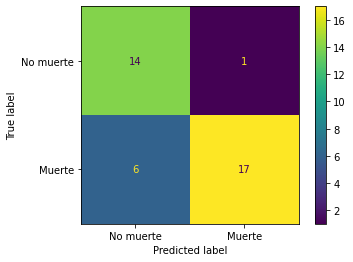

In [87]:
# Elastic Net
# De la misma manera que antes, es necesario utilizar la regresión logistica con parámetros diferentes, en este caso usaremos la penalización elastic net, que es la que se emplea
# en el modelo elastic net. En este caso, solo hay un solver que soporte esta penalización
elastic_net = LogisticRegression(penalty="elasticnet", solver='saga', l1_ratio=0.5) # INiciamos el modelo con l1_ratio = 0.5, así Ridge y LASSO tienen la misma importancia

# Valores de C y l1_ratio
parameters = {"C":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20,30], "l1_ratio": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}

# Grid search para elastic net
elastic_net_regression = GridSearchCV(elastic_net, parameters, scoring='accuracy', cv=3)
elastic_net_regression.fit(scaled_train_c, Y_train_c)

print(f"El mejor valor de C es: {elastic_net_regression.best_params_['C']}")
print(f"El mejor valor de l1_ratio es: {elastic_net_regression.best_params_['l1_ratio']}") # Hemos obtenido un valor de l1_ratio de 0.8 lo que indica una mayor importancia de LASSO

# Entrenamos

elastic_net = LogisticRegression(penalty = "elasticnet", solver="saga",C=elastic_net_regression.best_params_['C'], l1_ratio=elastic_net_regression.best_params_['l1_ratio'])
elastic_net_regression = elastic_net.fit(scaled_train_c, Y_train_c)

print(f"El valor de los coeficientes para cada una de las variables es: {elastic_net_regression.coef_}")
# Las variables que no se consideran relevantes en este método son: age, creatinine phosphokinase, time y sex

# Obtenemos la salida predicha
y_pred_elastic_net = elastic_net_regression.predict(scaled_test_c)

# Calculamos el accuracy
accuracy_e = accuracy_score(Y_test_c, y_pred_elastic_net)
print(f'Accuracy del modelo: {accuracy_e}')
acc_results_c.append(accuracy_e)

# Calculamos la precisión
precision_e = metrics.precision_score(Y_test_c, y_pred_elastic_net)
print(f'Precisión del modelo: {precision_e}')
prec_results_c.append(precision_e)

# Calculamos el recall
recall_e = metrics.recall_score(Y_test_c, y_pred_elastic_net)
print(f'Sensibilidad del modelo: {recall_e}')
recall_results_c.append(recall_e)

# Calculamos el f1 score
f1_e = metrics.f1_score(Y_test_c, y_pred_elastic_net)
print(f'F1 score del modelo: {f1_e}')
f1_results_c.append(f1_e)

# Calculamos el accuracy con validación cruzada
acc_cv = cross_val_score(elastic_net_regression, scaled_train_c, Y_train_c, scoring='accuracy', cv=3)
acc_results_c_cv.append(np.mean(acc_cv))
print(f'Accuracy del modelo con validación cruzada: {np.mean(acc_cv)}')

# Calculamos la precisión con validación cruzada
prec_cv = cross_val_score(elastic_net_regression, scaled_train_c, Y_train_c, scoring='precision', cv=3)
prec_results_c_cv.append(np.mean(prec_cv))
print(f'Precisión del modelo con validación cruzada: {np.mean(prec_cv)}')

# Calculamos la sensibilidad con validación cruzada
recall_cv = cross_val_score(elastic_net_regression, scaled_train_c, Y_train_c, scoring='recall', cv=3)
recall_results_c_cv.append(np.mean(recall_cv))
print(f'Sensibilidad del modelo con validación cruzada: {np.mean(recall_cv)}')

# Calculamos el f1 score con validación cruzada
f1_cv = cross_val_score(elastic_net_regression, scaled_train_c, Y_train_c, scoring='f1', cv=3)
f1_results_c_cv.append(np.mean(f1_cv))
print(f'F1 score del modelo con validación cruzada: {np.mean(f1_cv)}')

#También podemos observar la matriz de confusión

ConfusionMatrixDisplay(confusion_matrix(Y_test_c, y_pred), display_labels=["No muerte", "Muerte"]).plot()

### Comparación

In [88]:
results = pd.DataFrame()

# Predicciones correctas en el total de predicciones
results["Accuracy en el conjunto de test"] = acc_results_c
# Predicciones correctas en el total de predicciones positivas
results["Precision en el conjunto de test"] = prec_results_c
# Predicciones correctas en el total de casos positivos
results["Sensibilidad en el conjunto de test"] = recall_results_c
# Media armónica entre precision y recall
results["F1 score en el conjunto de test"] = f1_results_c

results["Accuracy con validación cruzada"] = acc_results_c_cv
results["Precision con validación cruzada"] = prec_results_c_cv
results["Sensibilidad con validación cruzada"] = recall_results_c_cv
results["F1 score con validación cruzada"] = f1_results_c_cv

#results
results["Models"] = ["Regresión logística lineal", "RL multivariable","Rigde", "Lasso", "Elastic Net"]
results.set_index("Models", inplace = True)

results

,Accuracy en el conjunto de test,Precision en el conjunto de test,Sensibilidad en el conjunto de test,F1 score en el conjunto de test,Accuracy con validación cruzada,Precision con validación cruzada,Sensibilidad con validación cruzada,F1 score con validación cruzada
Models,,,,,,,,
Regresión logística lineal,0.789474,0.894737,0.739130,0.809524,0.760153,0.761111,0.697802,0.723045
RL multivariable,0.815789,0.944444,0.739130,0.829268,0.773563,0.832977,0.628205,0.707172
Rigde,0.631579,0.909091,0.434783,0.588235,0.693870,0.805556,0.424908,0.545528
Lasso,0.815789,0.900000,0.782609,0.837209,0.727586,0.719195,0.675824,0.687217
Elastic Net,0.815789,0.900000,0.782609,0.837209,0.727969,0.750000,0.600733,0.662271


Comparando los distintos modelos, podemos obserbar que tanto LASSO como ElasticNet (debido al alto ratio de l1) son los que mejor sensibilidad tienen (que es la métrica que más nos interesa), además tienen el f1 score más alto. Observando todas las matrices de confusión, podemos ver que dichos modelos son muy buenos predictores.
Teniendo en cuenta los resultados de la validación cruzada, todas las métricas disminuyen un poco, pero esto tiene sentido ya que en train hemos utilizado un mismo conjunto de datos para entrenar y predecir, haciendo que los modelos estén mejor ajustados para dicho conjunto. 

El mejor valor de C es: 20
El valor de los coeficientes para cada una de las variables es: [[ 1.48789069 -0.35556829  0.44030735 -2.05041628 -0.28218766  0.69867073
   3.63359615  0.         -0.60311444  0.         -5.51896923  2.51510721]]
Accuracy del modelo: 0.8947368421052632
Precisión del modelo: 1.0
Sensibilidad del modelo: 0.8
F1 score del modelo: 0.888888888888889


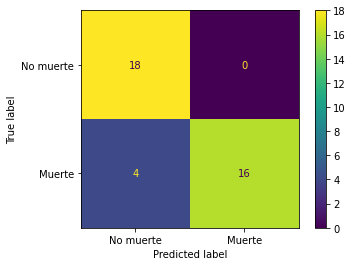

In [89]:
# Realizamos otra particion para el conjunto de test y el conjunto de train y probamos el modelo LASSO, ya que es el que mejores resultados nos ha dado.

X_train_c, X_test_c, Y_train_c, Y_test_c = train_test_split(data_c, data_c_output, test_size=0.3, random_state = 7)

# Normalizamos el conjunto de train
X_res_train_c = X_train_c.copy()

scaler = preprocessing.MinMaxScaler()

data_minmax_c = scaler.fit_transform(X_res_train_c)

scaled_train_c = pd.DataFrame(data_minmax_c, columns=X_res_train_c.columns)

# Normalizamos el conjunto de test

X_res_test_c = X_test_c.copy()

data_minmax_c = scaler.transform(X_res_test_c)

scaled_test_c = pd.DataFrame(data_minmax_c, columns=X_res_test_c.columns)

# LASSO

lasso_ = LogisticRegression(penalty="l1", solver='liblinear')

# Valores de C

parameters = {"C":[1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20,30]}

# Grid search para lasso regression

lasso_regression_ = GridSearchCV(lasso_, parameters, scoring='accuracy', cv=3)
lasso_regression_.fit(scaled_train_c, Y_train_c)
print(f"El mejor valor de C es: {lasso_regression_.best_params_['C']}")

# Entrenamos

lasso_ = LogisticRegression(penalty = "l1", solver = "liblinear", C=lasso_regression_.best_params_['C'])
lasso_regression_ = lasso_.fit(scaled_train_c, Y_train_c)

print(f"El valor de los coeficientes para cada una de las variables es: {lasso_regression_.coef_}")

# Obtenemos la salida predicha
y_pred_lasso = lasso_regression_.predict(scaled_test_c)

# Calculamos el accuracy
accuracy_l = accuracy_score(Y_test_c, y_pred_lasso)
print(f'Accuracy del modelo: {accuracy_l}')

# Calculamos la precisión
precision_l = metrics.precision_score(Y_test_c, y_pred_lasso)
print(f'Precisión del modelo: {precision_l}')

# Calculamos el recall
recall_l = metrics.recall_score(Y_test_c, y_pred_lasso)
print(f'Sensibilidad del modelo: {recall_l}')

# Calculamos el f1 score
f1_l = metrics.f1_score(Y_test_c, y_pred_lasso)
print(f'F1 score del modelo: {f1_l}')

#También podemos observar la matriz de confusión

ConfusionMatrixDisplay(confusion_matrix(Y_test_c, y_pred_lasso), display_labels=["No muerte", "Muerte"]).plot()

# Como podemos observar, los resultados son muy similares a los obtenidos anteriormente, por lo que podemos decir que el modelo es estable


Accuracy de la predicción: 0.868421052631579
Precisión de la predicción: 0.8947368421052632
Sensibilidad de la predicción: 0.85
F1 score de la predicción: 0.8717948717948718


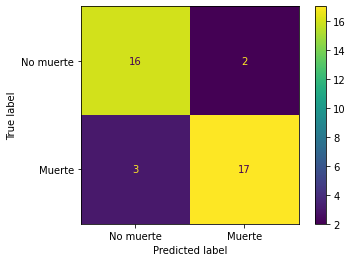

In [90]:
# Ahora con el modelo que habiamos entrenado antes, vamos a probar que tal funciona el predictor con los datos de la nueva partición


# Obtenemos la salida predicha
y_pred_lasso = lasso_regression.predict(scaled_test_c)

# Calculamos el accuracy
accuracy_l = accuracy_score(Y_test_c, y_pred_lasso)
print(f'Accuracy de la predicción: {accuracy_l}')

# Calculamos la precisión
precision_l = metrics.precision_score(Y_test_c, y_pred_lasso)
print(f'Precisión de la predicción: {precision_l}')

# Calculamos el recall
recall_l = metrics.recall_score(Y_test_c, y_pred_lasso)
print(f'Sensibilidad de la predicción: {recall_l}')

# Calculamos el f1 score
f1_l = metrics.f1_score(Y_test_c, y_pred_lasso)
print(f'F1 score de la predicción: {f1_l}')

#También podemos observar la matriz de confusión

ConfusionMatrixDisplay(confusion_matrix(Y_test_c, y_pred_lasso), display_labels=["No muerte", "Muerte"]).plot()

# Podemos observar que las métricas son bastante buenas, al igual que la matriz de confusión, por lo que podemos concluir finalmente que el modelo es estable